In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from tensorflow.keras.callbacks import EarlyStopping
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nFirst 5 rows of X:")
display(X.head())
print("\nFirst 5 values of y:")
display(y.head())

Shape of X: (10000, 10)
Shape of y: (10000,)

First 5 rows of X:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10



First 5 values of y:


,Exited
0,1
1,0
2,1
3,0
4,0


In [4]:
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)
print("Shape of X after one-hot encoding:", X.shape)

print("\nFirst 5 rows of X after one-hot encoding:")
X.head()

Shape of X after one-hot encoding: (10000, 11)

First 5 rows of X after one-hot encoding:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8000, 11)
Shape of X_test: (2000, 11)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


In [6]:
from sklearn.preprocessing import StandardScaler

# Convert boolean columns to integer type (0 or 1)
boolean_cols = ['Geography_Germany', 'Geography_Spain', 'Gender_Male']
X_train[boolean_cols] = X_train[boolean_cols].astype(int)
X_test[boolean_cols] = X_test[boolean_cols].astype(int)

print("Boolean columns in X_train converted to int:")
display(X_train[boolean_cols].head())
print("\nBoolean columns in X_test converted to int:")
display(X_test[boolean_cols].head())

Boolean columns in X_train converted to int:


,Geography_Germany,Geography_Spain,Gender_Male
9254,0,0,1
1561,1,0,1
1670,0,1,1
6087,0,0,0
6669,0,0,1



Boolean columns in X_test converted to int:


,Geography_Germany,Geography_Spain,Gender_Male
6252,1,0,1
4684,0,0,1
1731,0,1,0
4742,1,0,1
4521,0,1,0


In [7]:
numerical_cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()

X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

print("First 5 rows of X_train after scaling numerical features:")
display(X_train.head())
print("\nFirst 5 rows of X_test after scaling numerical features:")
display(X_test.head())

First 5 rows of X_train after scaling numerical features:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,0.356500,-0.655786,0.345680,-1.218471,0.808436,1,1,1.367670,0,0,1
1561,-0.203898,0.294938,-0.348369,0.696838,0.808436,1,1,1.661254,1,0,1
1670,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,1,0,-0.252807,0,1,1
6087,-0.940717,-1.131148,1.386753,0.953212,-0.916688,1,0,0.915393,0,0,0
6669,-1.397337,1.625953,1.386753,1.057449,-0.916688,0,0,-1.059600,0,0,1



First 5 rows of X_test after scaling numerical features:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6252,-0.577496,-0.655786,-0.695393,0.329937,0.808436,0,0,-1.019605,1,0,1
4684,-0.297297,0.390011,-1.389442,-1.218471,0.808436,1,1,0.798883,0,0,1
1731,-0.525607,0.485083,-0.348369,-1.218471,0.808436,1,0,-0.727980,0,1,0
4742,-1.511492,1.911170,1.039728,0.689272,0.808436,1,1,1.221387,1,0,1
4521,-0.951094,-1.131148,0.692704,0.782839,-0.916688,1,1,0.247560,0,1,0


In [8]:
from keras.models import Sequential
from keras.layers import Dense , Input

In [9]:
model = Sequential(name='Customer_Churn_Predictor')

model.add(Input(shape=(X_train.shape[1],) , name='input_layer'))
# model.add(Dense(64, activation='relu' , name='hidden_layer_1'))
# model.add(Dense(32, activation='relu' , name='hidden_layer_2'))
model.add(Dense(16, activation='relu' , name='hidden_layer_3'))
model.add(Dense(1, activation='sigmoid' , name='output_layer'))

In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.summary()

Model: "Customer_Churn_Predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_3 (Dense)          │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7859 - loss: 0.5122 - val_accuracy: 0.8019 - val_loss: 0.4412
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7933 - loss: 0.4549 - val_accuracy: 0.8138 - val_loss: 0.4200
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8117 - loss: 0.4274 - val_accuracy: 0.8213 - val_loss: 0.4072
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8290 - loss: 0.4045 - val_accuracy: 0.8275 - val_loss: 0.3969
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8422 - loss: 0.3869 - val_accuracy: 0.8388 - val_loss: 0.3877
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8417 - loss: 0.3875 - val_accuracy: 0.8406 - val_loss: 0.3793
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8472 - loss: 0.3768 - val_accuracy: 0.8431 - val_loss: 0.3732
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8484 - loss: 0.3704 - val_accu

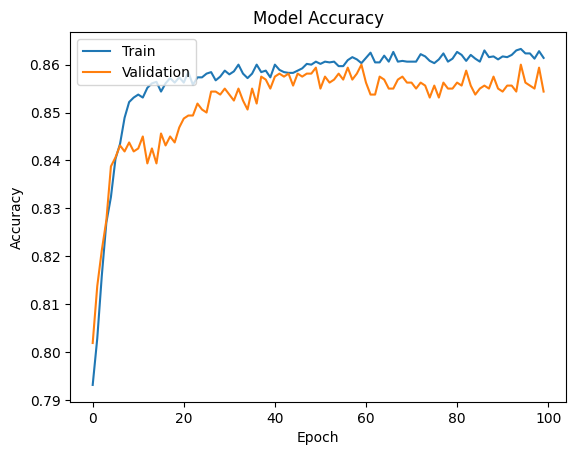

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


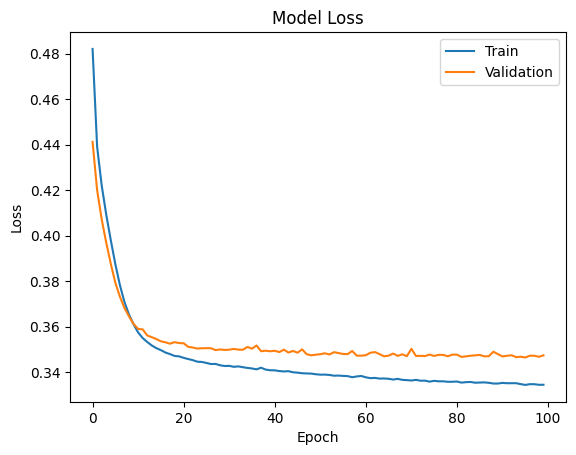

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

In [15]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [16]:
result = []

for y_hat in y_pred:
  if y_hat > 0.5:
    result.append(1)
  else:
    result.append(0)


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , result)

0.858

# Early Stopping

In [21]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

history = model.fit(X_train , y_train , validation_split=0.2 , epochs=100 , callbacks=[callback])

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8654 - loss: 0.3291 - val_accuracy: 0.8569 - val_loss: 0.3470
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8567 - loss: 0.3374 - val_accuracy: 0.8550 - val_loss: 0.3470
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8676 - loss: 0.3338 - val_accuracy: 0.8550 - val_loss: 0.3472
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8605 - loss: 0.3403 - val_accuracy: 0.8569 - val_loss: 0.3483
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8653 - loss: 0.3244 - val_accuracy: 0.8569 - val_loss: 0.3475
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8683 - loss: 0.3348 - val_accuracy: 0.8575 - val_loss: 0.3469
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8555 - loss: 0.3492 - val_accuracy: 0.8581 - val_loss: 0.3471
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8655 - loss: 0.3321 - val_accu

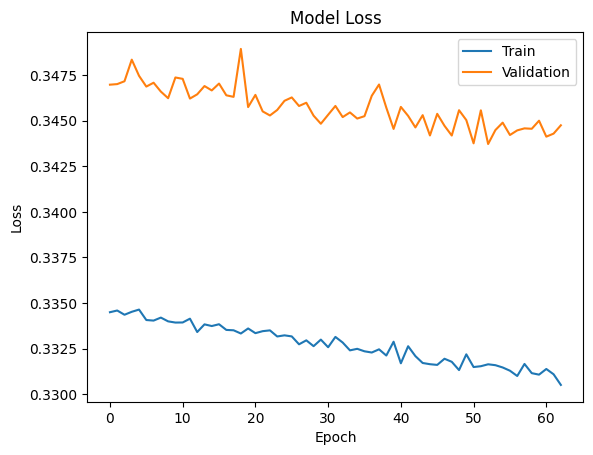

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

In [23]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [24]:
result = []

for y_hat in y_pred:
  if y_hat > 0.5:
    result.append(1)
  else:
    result.append(0)


In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , result)

0.86